# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
# Load the dataset
housing = pd.read_csv("Housing.csv")

# Inspect data
print(housing.head(25))
print(housing.info())
print(housing.describe())


            id             date      price  bedrooms  bathrooms  sqft_living  \
0   7229300521  20141013T000000   231300.0         2       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1225000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000

In [ ]:
# Determine min and max values of the zipcode column
min_zip = housing['zipcode'].min()
max_zip = housing['zipcode'].max()

# Generate 50 evenly spaced ranges
zip_ranges = np.linspace(min_zip, max_zip, 20)

# Pair the ranges into tuples
zip_pairs = [(int(zip_ranges[i]), int(zip_ranges[i + 1])) for i in range(len(zip_ranges) - 1)]

# Display the pairs
for i, pair in enumerate(zip_pairs, start=1):
    print(f"Range {i}: {pair[0]} - {pair[1]}")
"""
housing['zip_range'] = zip_pairs
print(housing['zip_range'])
"""

Range 1: 98001 - 98011
Range 2: 98011 - 98021
Range 3: 98021 - 98032
Range 4: 98032 - 98042
Range 5: 98042 - 98053
Range 6: 98053 - 98063
Range 7: 98063 - 98073
Range 8: 98073 - 98084
Range 9: 98084 - 98094
Range 10: 98094 - 98105
Range 11: 98105 - 98115
Range 12: 98115 - 98126
Range 13: 98126 - 98136
Range 14: 98136 - 98146
Range 15: 98146 - 98157
Range 16: 98157 - 98167
Range 17: 98167 - 98178
Range 18: 98178 - 98188
Range 19: 98188 - 98199


"\nhousing['zip_range'] = zip_pairs\nprint(housing['zip_range'])\n"

# DATA GOUPING

We created the 'Age' column to show how old a house is because after running our prediction and testing on the model, we discovered that houses that were built more recently cost over a $100k less than older houses, and this is not supposed to be the case, as recently built houses usually cost more than older houses in most cases

In [ ]:
# Determine the age of all the houses
current_year = datetime.now().year
housing['age'] = current_year - housing['yr_built']

# Display the updated DataFrame with the new 'age' feature
print(housing[['yr_built', 'age']].head())


   yr_built  age
0      1955   69
1      1951   73
2      1933   91
3      1965   59
4      1987   37


In [ ]:
housing.head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,23
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,29
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,61
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,64
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,21


In [ ]:
housing2 = housing.groupby(['age', 'yr_built'])[['price', 'bedrooms', 'bathrooms', 'sqft_living']].mean().reset_index()

# Ask the professor if it's better to use the mean() instead of the sum() for values of the features

In [ ]:
housing2

,age,yr_built,price,bedrooms,bathrooms,sqft_living
0,9,2015,759785.157895,3.657895,2.763158,2596.315789
1,10,2014,683681.754919,3.724508,2.746422,2615.389982
2,11,2013,678545.452736,3.845771,2.850746,2636.592040
3,12,2012,527447.335294,3.576471,2.641176,2378.741176
4,13,2011,544522.000000,3.469231,2.640385,2313.684615
...,...,...,...,...,...,...
111,120,1904,583756.644444,2.911111,1.500000,1603.177778
112,121,1903,480958.195652,3.065217,1.505435,1507.739130
113,122,1902,673007.407407,3.555556,1.925926,1919.629630
114,123,1901,556935.931034,3.620690,1.577586,1763.620690


# Original Data Set Visualization

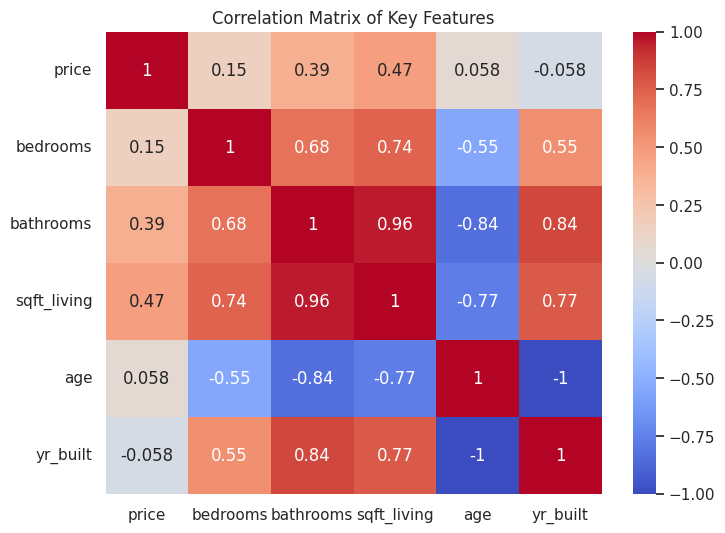

In [ ]:
# Selecting relevant features
housingFeatures = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'age', 'yr_built']
housingData = housing2[housingFeatures]

# Calculate the correlation matrix
graph = housingData.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(graph, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()


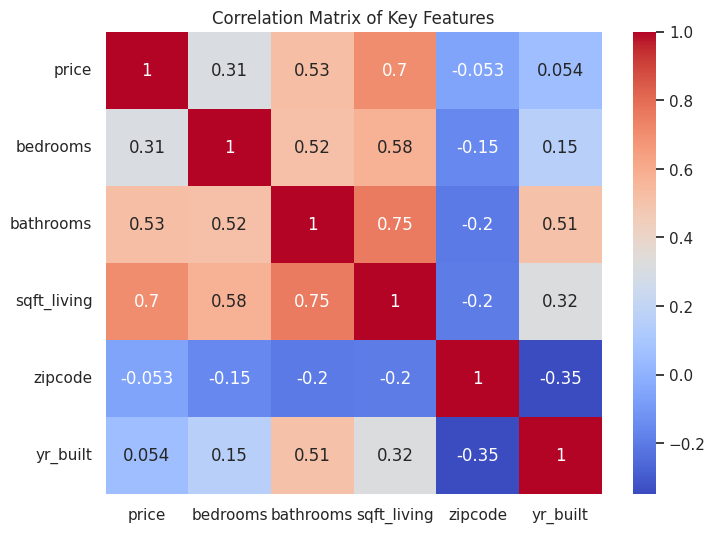

In [ ]:
# Selecting relevant features
housingFeatures = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'yr_built']
housingData = housing[housingFeatures]

# Calculate the correlation matrix
graph = housingData.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(graph, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()


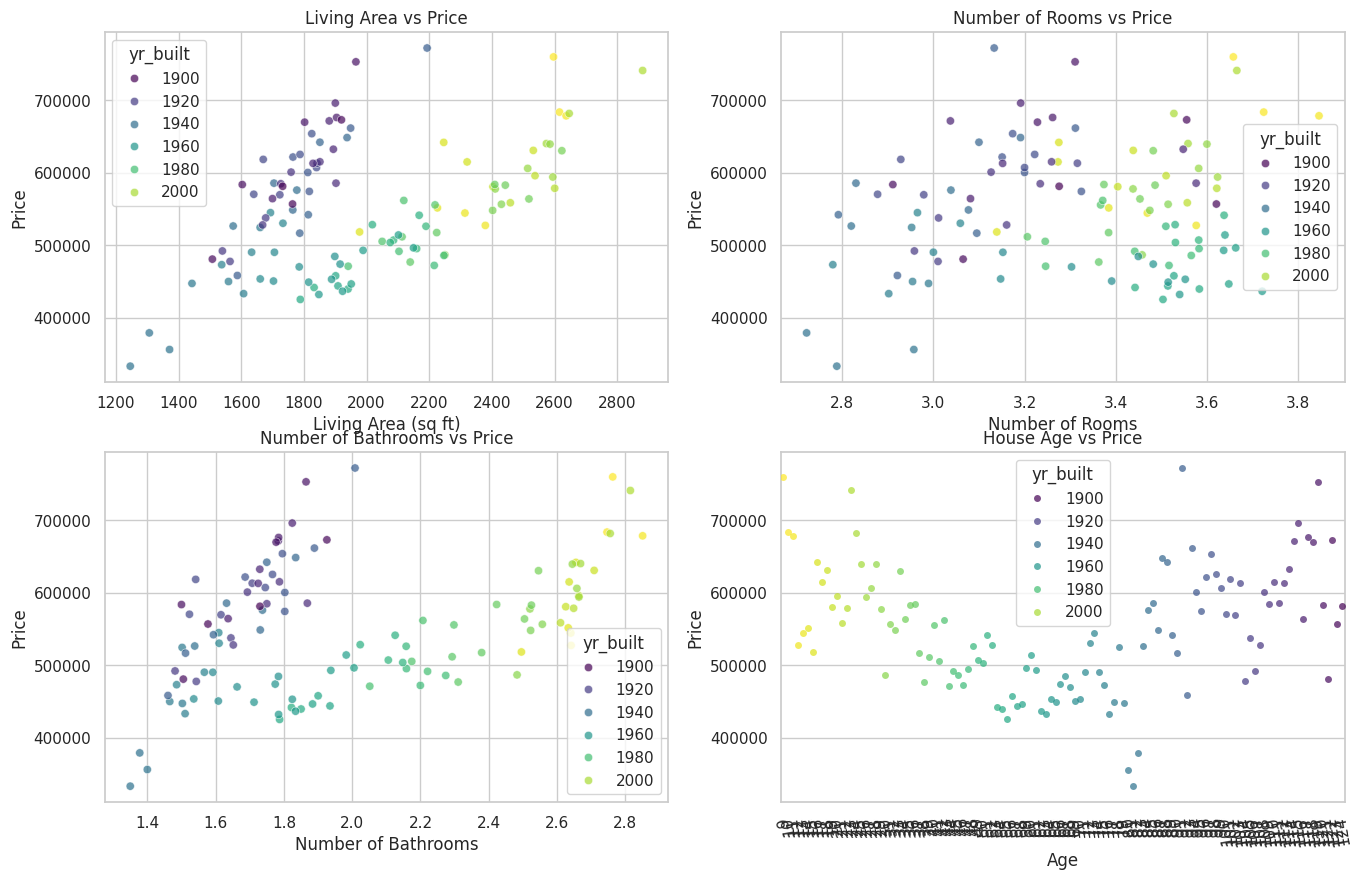

In [ ]:
# Scatter plot visualization using seaborn scatter plot()

plt.figure(figsize=(16, 10))
sns.set(style='whitegrid')

# Living Area vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(x='sqft_living', y='price', hue='yr_built', data=housing2, palette='viridis', alpha=0.7)
plt.title('Living Area vs Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price')

# Number of Rooms vs Price
plt.subplot(2, 2, 2)
sns.scatterplot(x='bedrooms', y='price', hue='yr_built', data=housing2, palette='viridis', alpha=0.7)
plt.title('Number of Rooms vs Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')

# Number of Bathrooms vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='bathrooms', y='price', hue='yr_built', data=housing2, palette='viridis', alpha=0.7)
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

# Year Built vs Price
plt.subplot(2, 2, 4)
sns.stripplot(x='age', y='price', hue='yr_built', data=housing2, palette='viridis', alpha=0.7)
plt.title('House Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.xticks(rotation=100)

#plt.tight_layout()
plt.show()


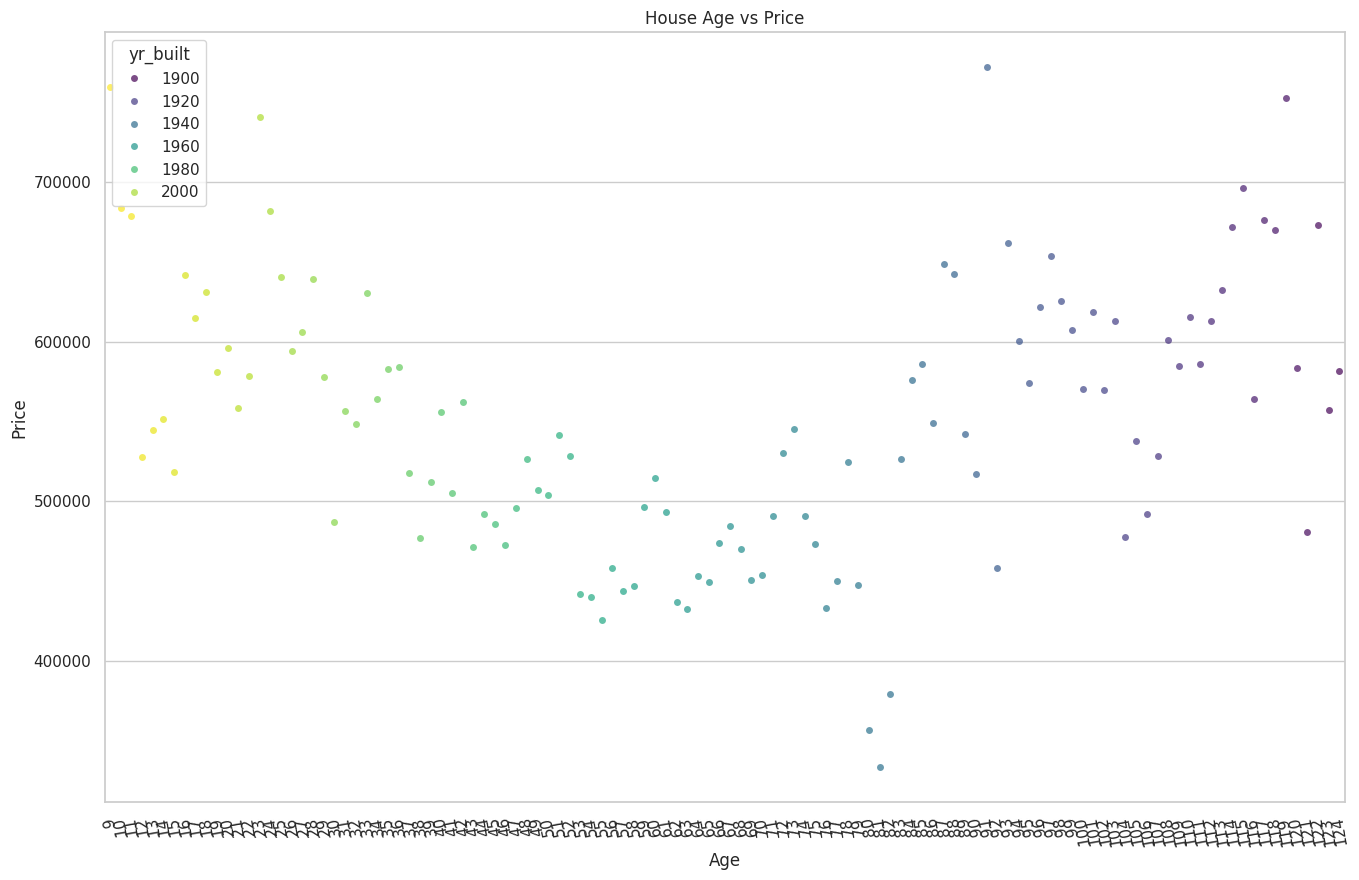

In [ ]:
# Year Built vs Price
plt.figure(figsize=(16, 10))
sns.stripplot(x='age', y='price', hue='yr_built', data=housing2, palette='viridis', alpha=0.7)
plt.title('House Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.xticks(rotation=100)

plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='zipcode', y='price', data=housing2)
plt.title('Price Distribution by Location')
plt.xticks(rotation=50)
plt.show()


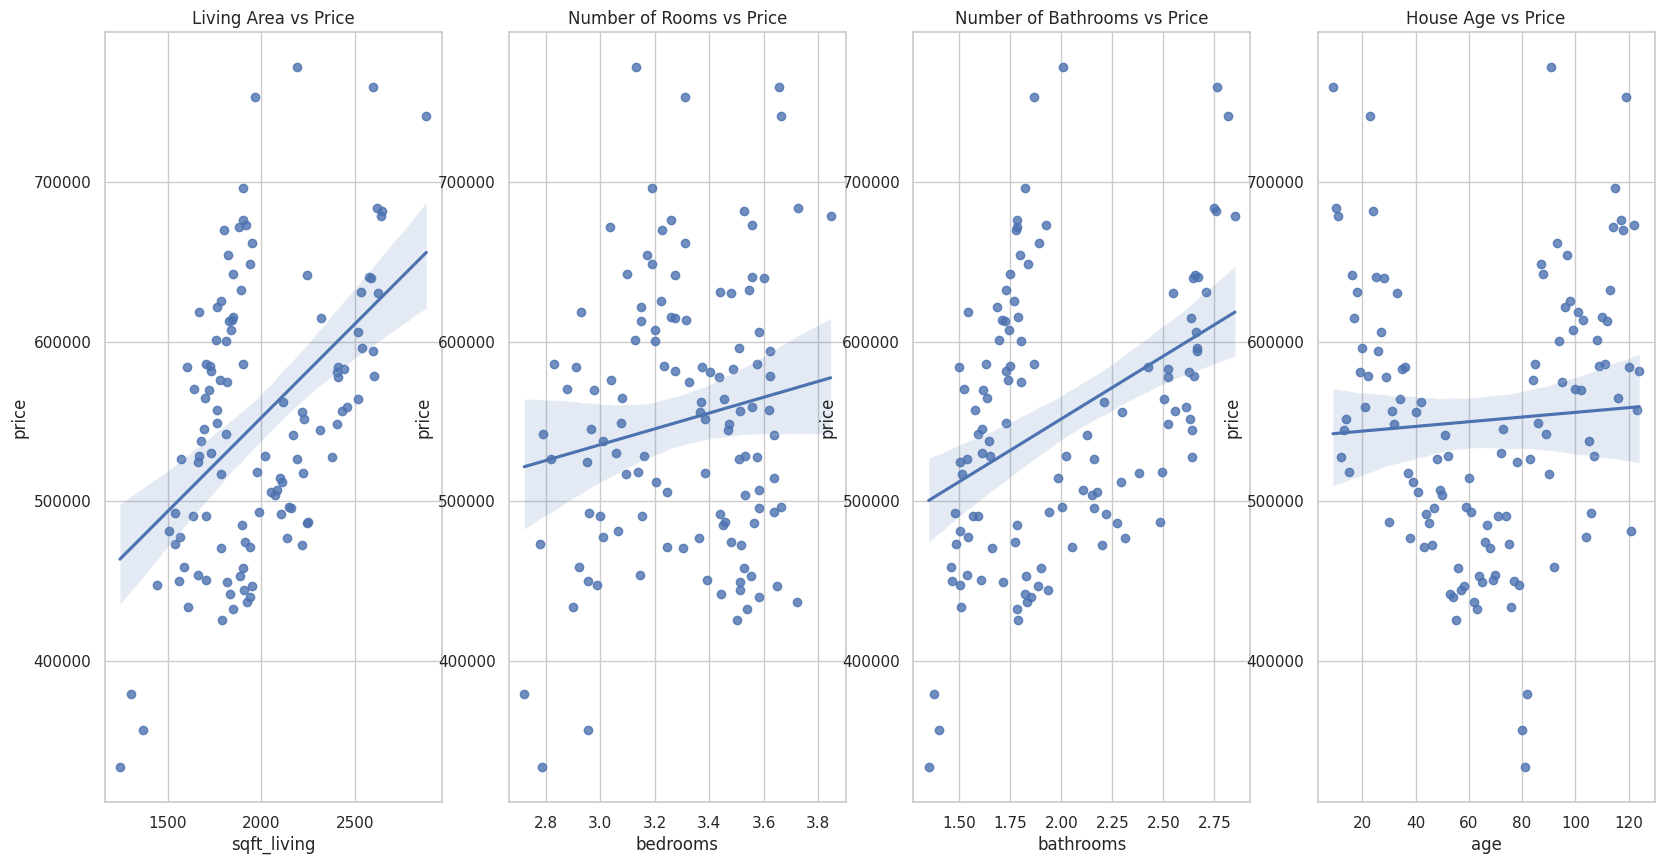

In [ ]:
# Linear regression visualization using Seaborn regplot()

plt.figure(figsize=(20, 10))

# Living Area vs. Price
plt.subplot(1, 4, 1)
sns.regplot(x='sqft_living', y='price', data=housing2)
plt.title('Living Area vs Price')

# No. of Rooms vs. Price
plt.subplot(1, 4, 2)
sns.regplot(x='bedrooms', y='price', data=housing2)
plt.title('Number of Rooms vs Price')

# No. of Bathrooms vs. Price
plt.subplot(1, 4, 3)
sns.regplot(x='bathrooms', y='price', data=housing2)
plt.title('Number of Bathrooms vs Price')

# Location vs. Price
plt.subplot(1, 4, 4)
sns.regplot(x='age', y='price', data=housing2)
plt.title('House Age vs Price')

#plt.tight_layout()
plt.show()


housing.drop(['lat', 'long', 'yr_renovated', 'waterfront', 'view'], axis=1, inplace=True)

In [ ]:
housing2.head()

,age,yr_built,price,bedrooms,bathrooms,sqft_living
0,9,2015,759785.157895,3.657895,2.763158,2596.315789
1,10,2014,683681.754919,3.724508,2.746422,2615.389982
2,11,2013,678545.452736,3.845771,2.850746,2636.592040
3,12,2012,527447.335294,3.576471,2.641176,2378.741176
4,13,2011,544522.000000,3.469231,2.640385,2313.684615


# Model Prediction using LINEAR REGRESSION

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'age']
X = housing2[features]
Y = housing2['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate
mean = mean_absolute_error(Y_test, y_pred)
rms = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f"Mean Absolute Error: {mean}")
print(f"Root Mean Squared Error: {rms}")


Mean Absolute Error: 36138.87480837317
Root Mean Squared Error: 50781.730163943466


In [ ]:
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

               Coefficient
bedrooms    -136424.392180
bathrooms    150758.965055
sqft_living     248.641000
age            3124.640673


In [ ]:
Y_test.mean()

552398.8721507977

In [ ]:
Y_test.median()

521916.6162310774

In [ ]:
housing2.shape

(116, 6)

In [ ]:
X_train.shape

(92, 4)

In [ ]:
X_train.head(25)

,bedrooms,bathrooms,sqft_living,age
2,3.845771,2.850746,2636.592040,11
75,3.038462,1.737179,1777.346154,84
6,3.139130,2.495652,1977.517391,15
35,3.441667,2.220833,2103.295833,44
109,3.228261,1.777174,1802.228261,118
106,3.191489,1.824468,1900.106383,115
52,3.636719,1.937500,1988.746094,61
49,3.648000,1.884000,1950.880000,58
20,3.437870,2.520710,2410.284024,29
100,3.234375,1.750000,1726.093750,109


In [ ]:
X_test.shape

(24, 4)

In [ ]:
X_test.head(25)

,bedrooms,bathrooms,sqft_living,age
9,3.438326,2.708700,2531.799559,18
94,3.315789,1.707237,1841.802632,103
90,3.200000,1.745455,1840.096970,99
54,3.540179,1.784598,1847.642857,63
0,3.657895,2.763158,2596.315789,9
30,3.206140,2.292763,2113.057018,39
93,2.978947,1.615789,1723.063158,102
29,3.362791,2.310465,2139.037209,38
97,2.958333,1.481250,1539.766667,106
103,3.151899,1.724684,1829.050633,112


In [ ]:
Y_test.head(25)

,price
9,630880.072687
94,613204.473684
90,607219.393939
54,432213.071429
0,759785.157895
30,511770.192982
93,569688.884211
29,476953.488372
97,492246.875000
103,612990.696203


In [ ]:
Y_train.head(25)

,price
2,678545.452736
75,576119.493590
6,518442.621739
35,491723.045833
109,669799.402174
106,696135.159574
52,493075.550781
49,446729.948000
20,577771.035503
100,584896.296875


# Conversion to Classification

In [ ]:
y_expected = Y_test

In [ ]:
# Define price categories for classification

threshold = y_expected.median()  # Using median price as the threshold
# Create actual classes
y_test_class = np.where(y_expected >= threshold, 'Low', 'High')
y_pred_class = np.where(y_pred >= threshold, 'Low', 'High')


# Visualization of Confusion Matrix


Confusion Matrix for bedrooms vs Price Categories:


<Figure size 1000x800 with 0 Axes>

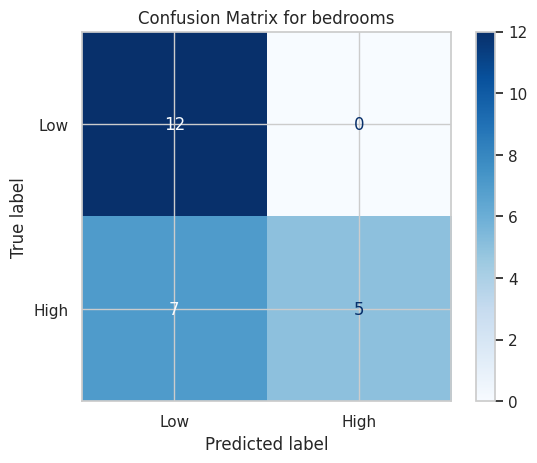


Confusion Matrix for bathrooms vs Price Categories:


<Figure size 1000x800 with 0 Axes>

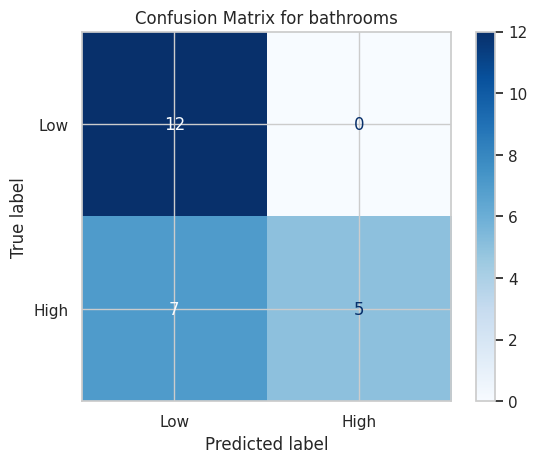


Confusion Matrix for sqft_living vs Price Categories:


<Figure size 1000x800 with 0 Axes>

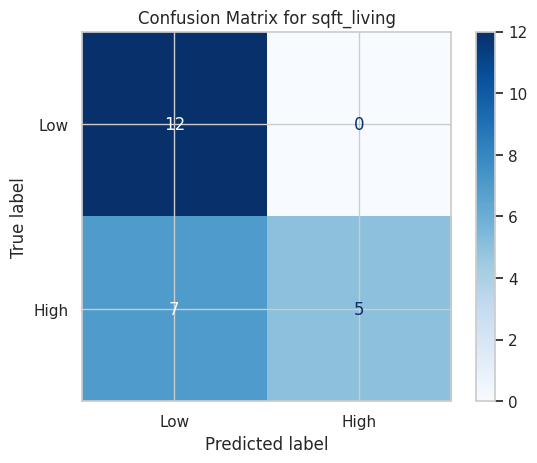


Confusion Matrix for age vs Price Categories:


<Figure size 1000x800 with 0 Axes>

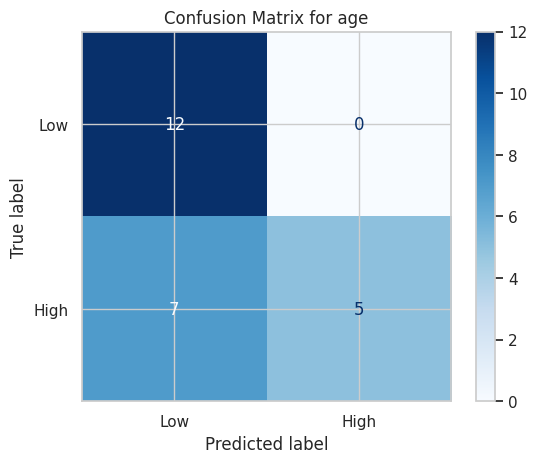

Model Accuracy: 0.71


In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'age']

for feature in features:
    print(f"\nConfusion Matrix for {feature} vs Price Categories:")

    # Confusion matrix to show actual vs predicted price categories for the given feature
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_class, y_pred_class, labels=['Low', 'High'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {feature}')
    plt.show()

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Model Accuracy: {accuracy:.2f}")


# Visualization of Actual Prices vs Predicted Prices

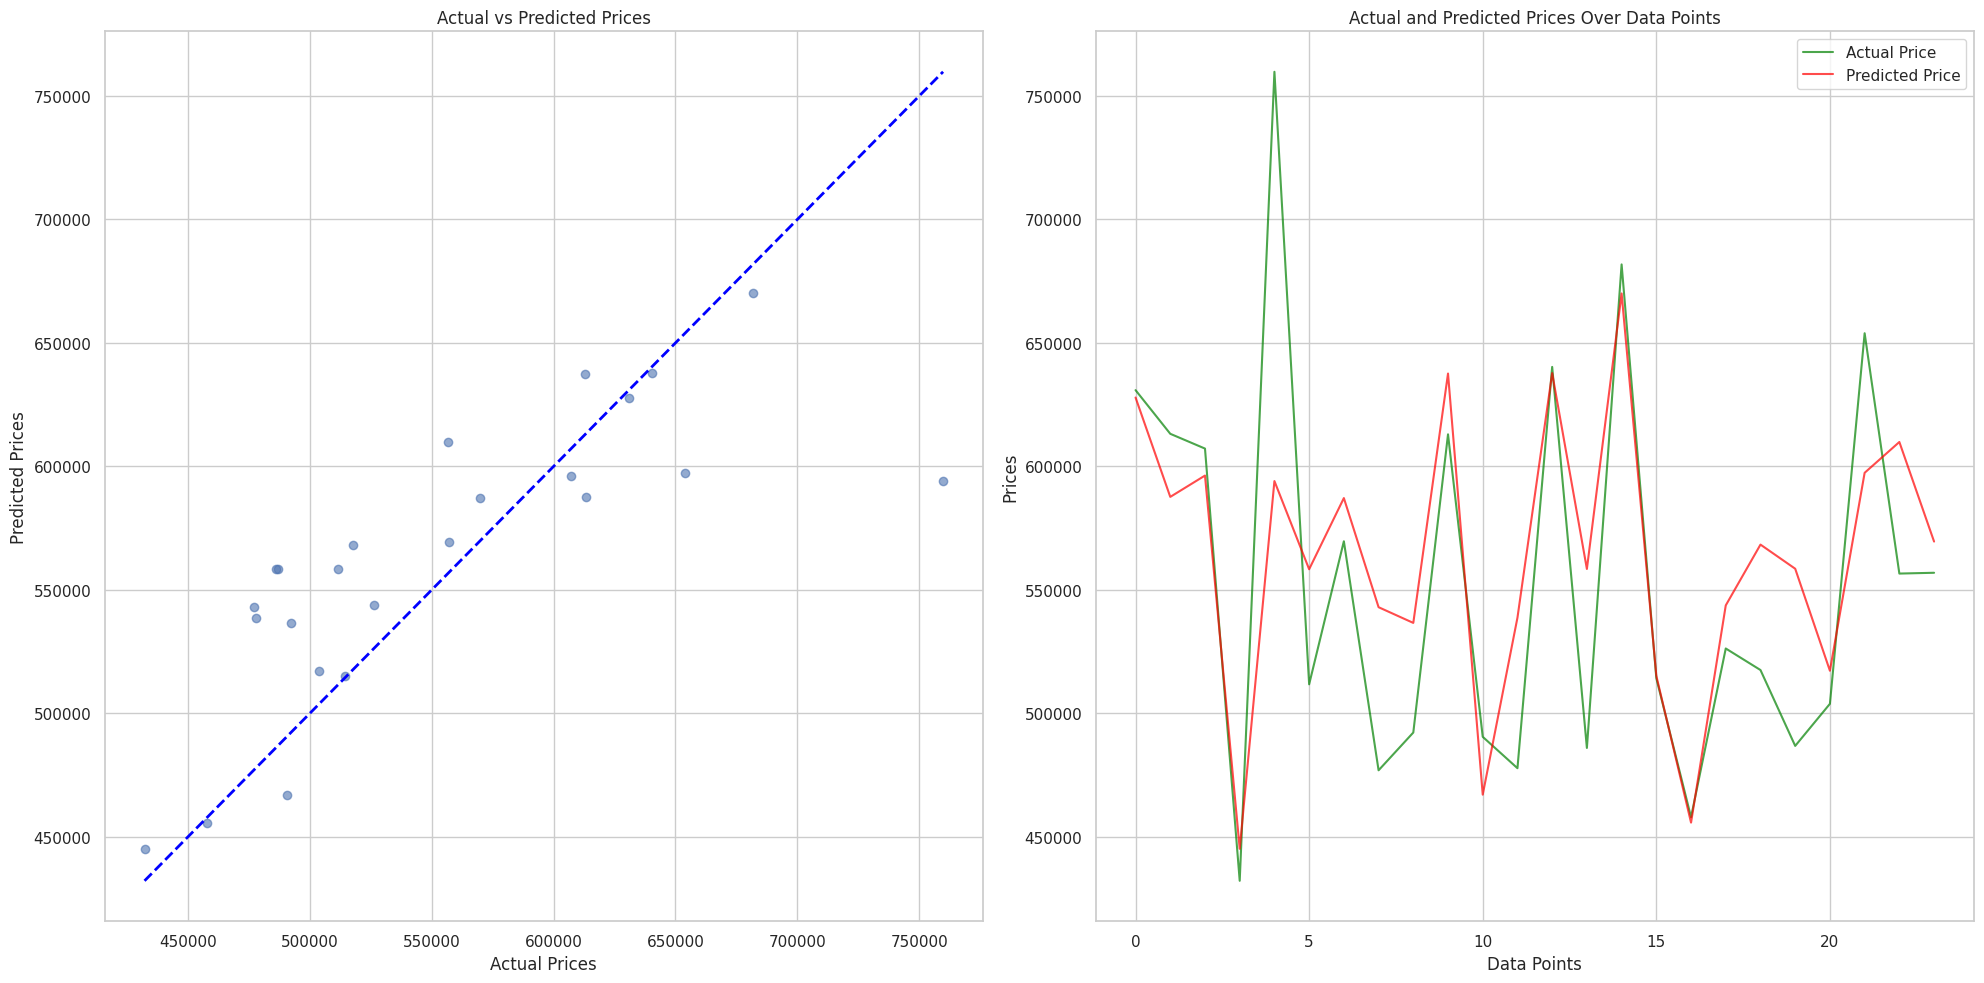

In [ ]:
# Here we visualize y_test (actual prices) and y_pred (predicted prices)
plt.figure(figsize=(20, 10))

# Scatter Plot of Actual vs Predicted Prices
plt.subplot(1, 2, 1)
plt.scatter(y_expected, y_pred, alpha=0.6, color='b')
plt.plot([y_expected.min(), y_expected.max()], [y_expected.min(), y_expected.max()], '--', lw=2, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Line Plot of Actual and Predicted Prices
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(y_expected)), y_expected, label='Actual Price', color='green', alpha=0.7)
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Price', color='red', alpha=0.7)
plt.xlabel('Data Points')
plt.ylabel('Prices')
plt.title('Actual and Predicted Prices Over Data Points')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_expected.head()

,price
9,630880.072687
94,613204.473684
90,607219.393939
54,432213.071429
0,759785.157895


# Model Prediction using Random Forest

In [ ]:
# Using the already defined X_train, X_test, Y_train, Y_test
rf_model = RandomForestRegressor(n_estimators=100, random_state=11)
rf_model.fit(X_train, Y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate Root Mean Square Error for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_expected, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

# Calculate Mean Absolute Error for Random Forest
mae_rf = mean_absolute_error(y_expected, y_pred_rf)
print("Random Forest Mean Absolute Error:", mae_rf)

Random Forest RMSE: 37378.53900126054
Random Forest Mean Absolute Error: 28468.614704788244


# Visualization Showing the Relationship between Linear Regression and Random Forest

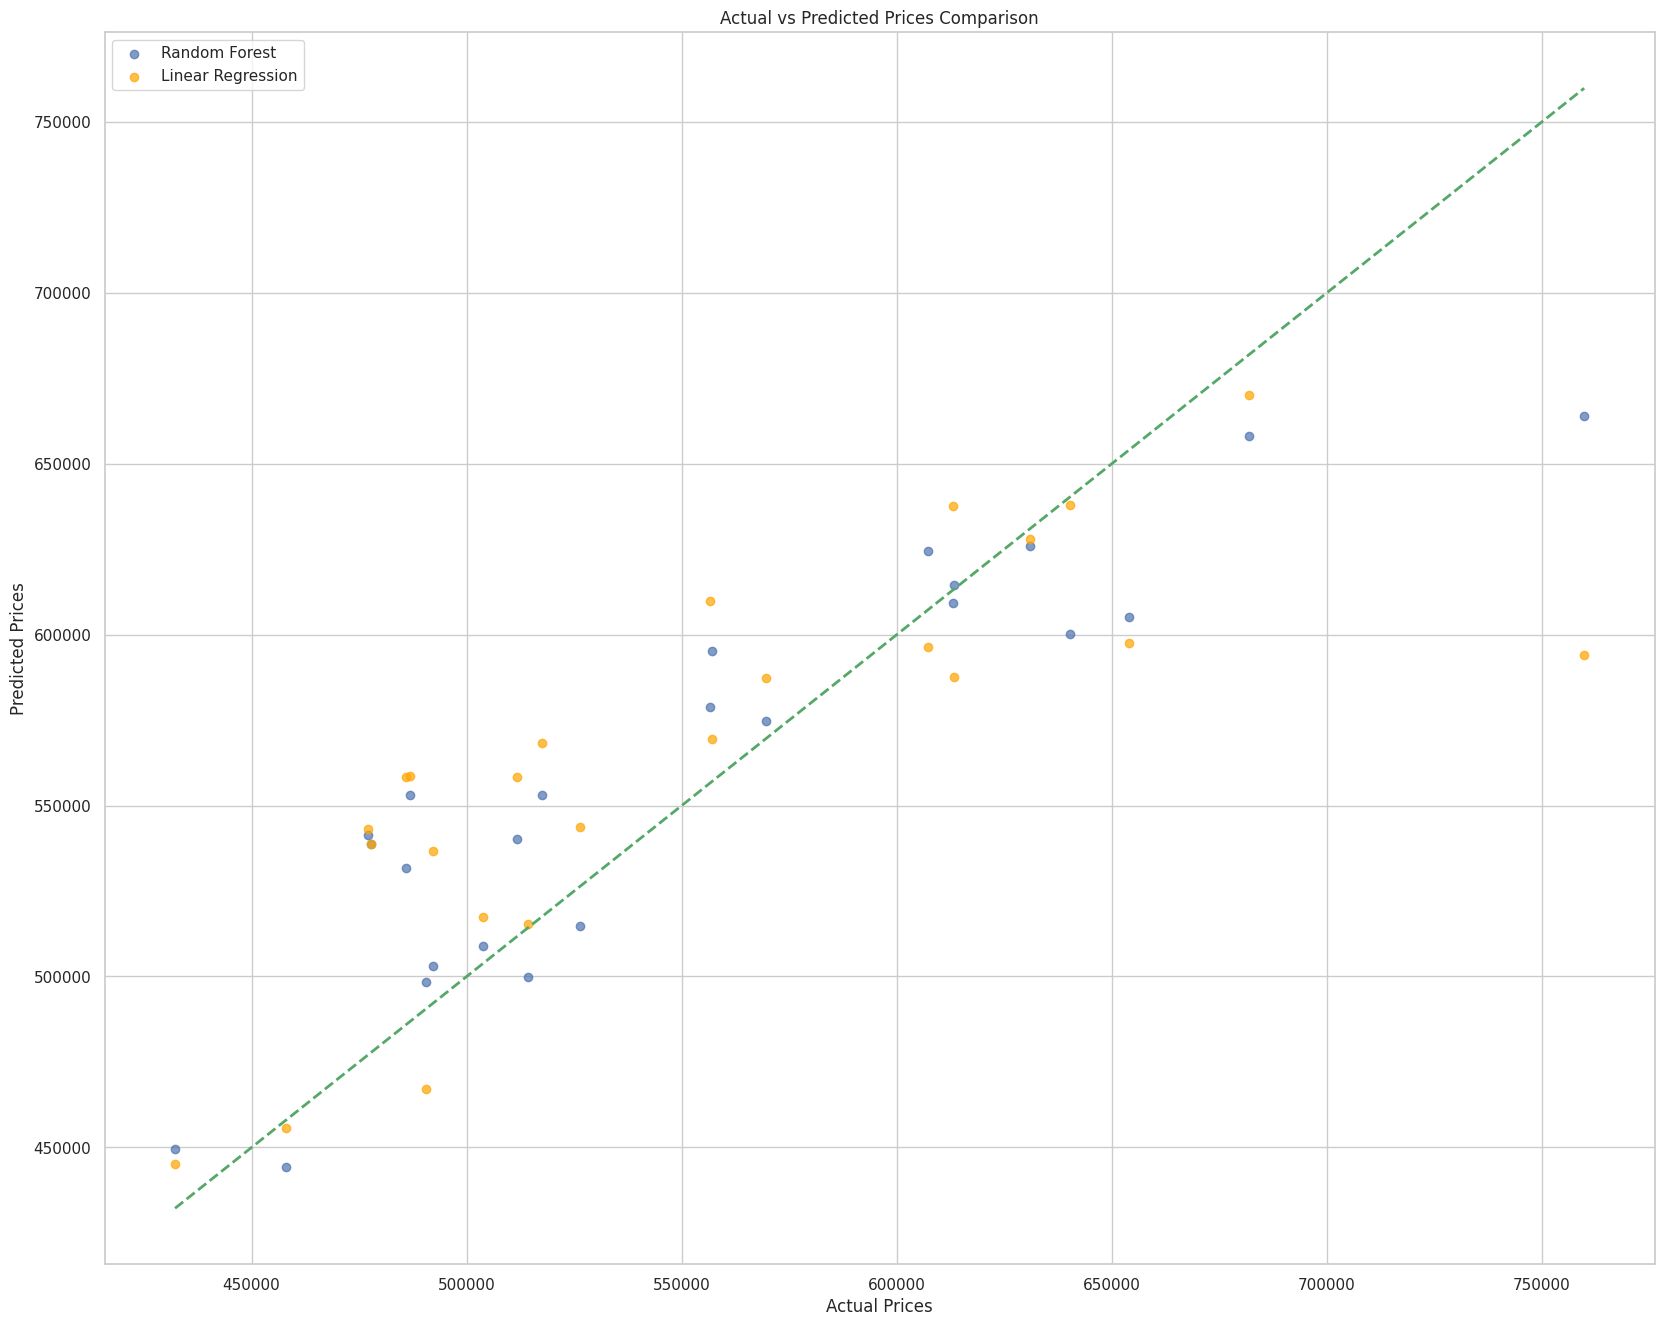

In [ ]:
plt.figure(figsize=(20, 16))
plt.scatter(y_expected, y_pred_rf, alpha=0.7, label="Random Forest")
plt.scatter(y_expected, y_pred, alpha=0.7, label="Linear Regression", color="orange")
plt.plot([y_expected.min(), y_expected.max()], [y_expected.min(), y_expected.max()], '--', color='g', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices Comparison')

plt.legend()
plt.show()
